In [1]:
"""
This script imports necessary libraries and sets up the plotting style for calibration plots.
"""

import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd
import SBNDstyle
import matplotlib.pyplot as plt
plt.style.use('SBND.mplstyle')


In [2]:
file_path = "calibrations.csv"

data=pd.read_csv(file_path)
data["OV"][data["OV"]>10]/=10;

data = data.drop_duplicates(subset=['OV', 'Gain',"N","set","ch"], keep='last')
data.to_csv(file_path, index=False)


/tmp/ipykernel_29096/683761574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["OV"][data["OV"]>10]/=10;


## Total Gain

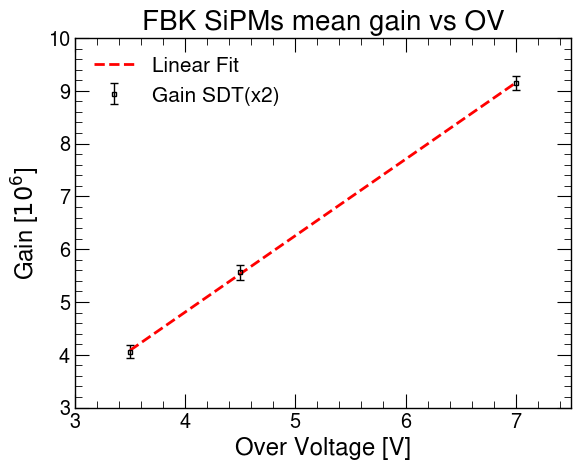

In [7]:
import numpy as np
# plt.plot(data['OV'].array,data['Gain'].array,'^',markersize=2)

grouped_data_mean = data.groupby('OV')['Gain'].mean().to_list()
grouped_data_std  = data.groupby('OV')['Gain'].std() .to_list()
OVs=unique_values = data["OV"].unique()
plt.errorbar(OVs,grouped_data_mean,np.array(grouped_data_std)*2,fmt='--s',markersize=3,markerfacecolor="None",capsize=3,capthick=1,elinewidth=1,ecolor="black",color="black",linewidth=0,label="Gain SDT(x2)")
slope, intercept = np.polyfit(OVs, grouped_data_mean, 1)
linear_fit = np.polyval([slope, intercept], OVs)

plt.legend(loc='upper left', fontsize=15)
plt.title('Mean Gain vs OV', fontsize=20)
plt.xlabel('OV [V]')
plt.ylabel('Gain')
plt.xlim(3, 7.5)
plt.ylim(3, 10)

plt.plot(OVs, linear_fit, '--', label='Linear Fit', color='red'
         )

plt.legend(loc='upper left', fontsize=15)
plt.title('FBK SiPMs mean gain vs OV', fontsize=20)
plt.xlabel('Over Voltage [V]')
plt.ylabel('Gain [$10^6$]')
plt.xlim(3, 7.5)
plt.ylim(3, 10)
plt.savefig("final_plots/Gain_vs_OV_total.png", bbox_inches='tight')
plt.savefig("final_plots/Gain_vs_OV_total.pdf", bbox_inches='tight')

## Plotting the gain vs OV for each channel

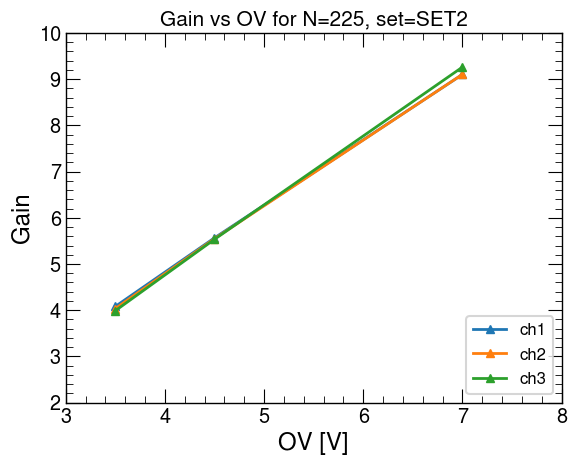

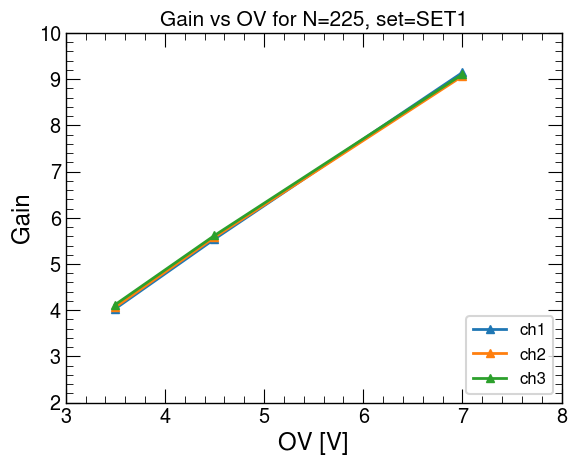

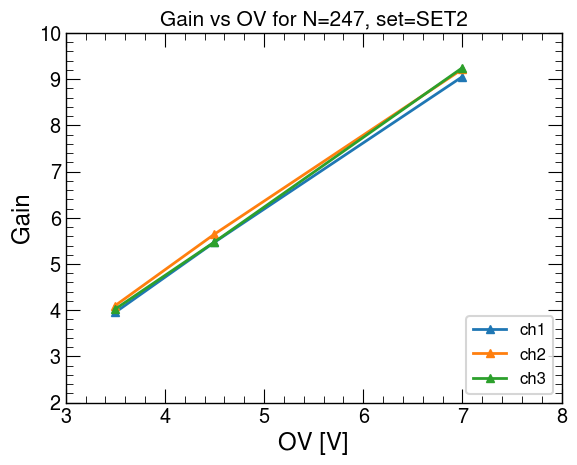

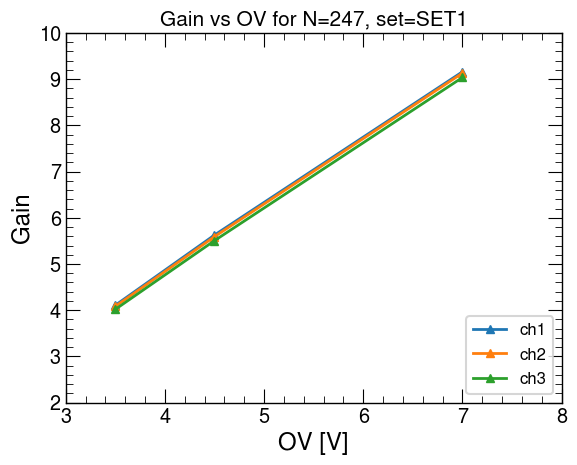

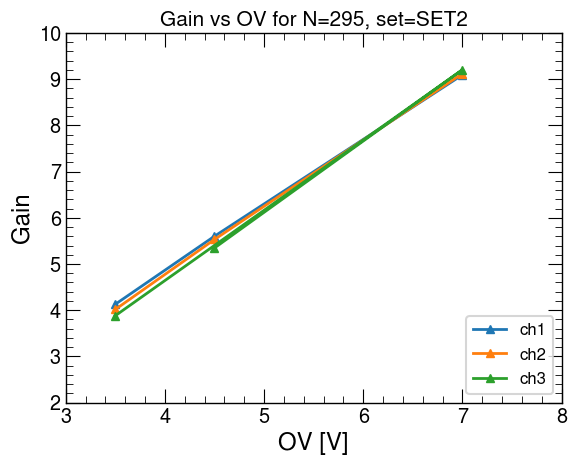

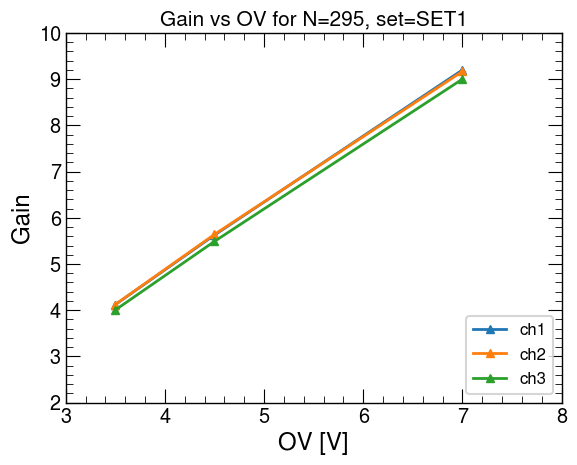

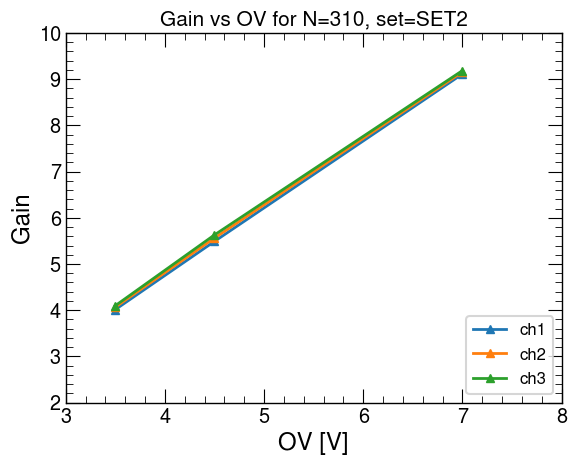

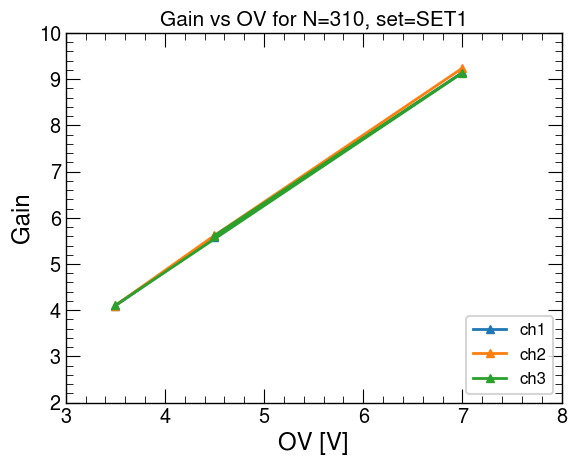

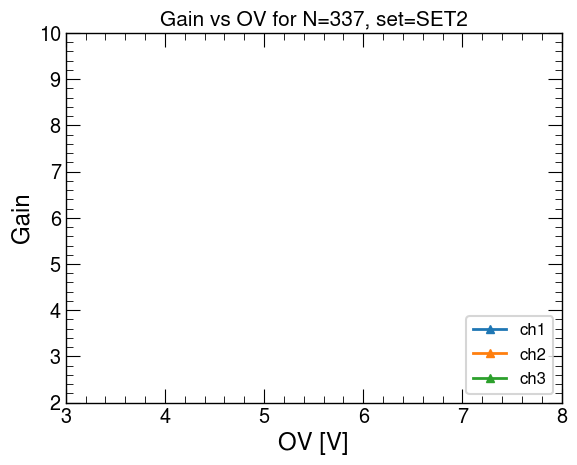

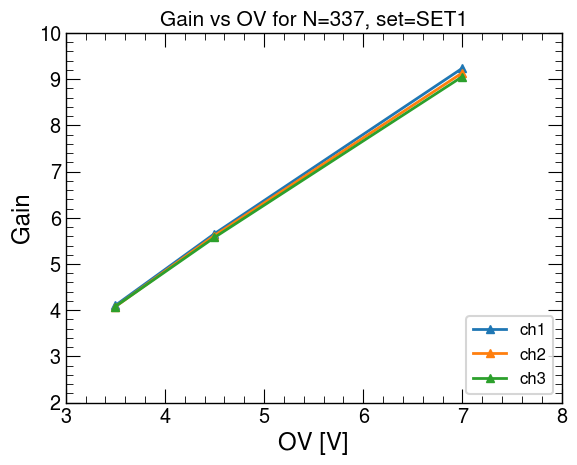

In [5]:
for N in [225,247,295,310,337]:
    for s in ["SET2","SET1"]:
        plt.figure()
        for ch in [1,2,3]:
            aux=data[(data['N']==N) & (data['set']==s) & (data['ch']==ch)]

            plt.plot(aux['OV'].array,aux['Gain'].array,'-^',label=f'ch{ch}')
            plt.title(f'Gain vs OV for N={N}, set={s}',fontsize=15)
            plt.legend(frameon=True,loc='lower right')
            plt.xlabel('OV [V]')
            plt.ylabel('Gain')
            plt.xlim(3,8)
            plt.ylim(2,10)